# 2. Haz un algoritmo que calcule la función de correlación con DD/RR-1 con el mismo número de puntos aleatorios que datos, y comprueba que si usas muestras aleatorias la función de correlación es cero. Cambia el número de puntos y el tamaño de bin, y observa qué ocurre.

In [1]:
# Aqui cargamos las liberias a usar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.special
import numpy as np
import math

Construimos una distribucion de puntos en una malla cuadriculada

In [163]:
separacion = 25
longitud = 1000

def construyecaja (l, s):
    nxlado = int(l / s)
    ntot = nxlado ** 2
    px = []
    py = []
    c = 1
    for i in range(1, nxlado):
        for j in range(1, nxlado):
            px.append(s * i)
            py.append(s * j)
            c += 1
    return px, py

x1, y1 = construyecaja(longitud, separacion)



Construimos una distribucion de puntos aleatorios

In [156]:
x2 = np.random.uniform(0, longitud, len(x1))
y2 = np.random.uniform(0, longitud, len(x1))

Graficamos ambas distribuciones

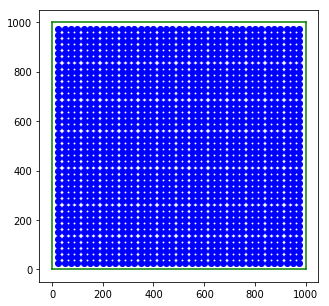

In [159]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud, 2)
q3 = np.linspace(longitud, longitud, 2)

plt.figure(figsize=(5, 5))
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')

plt.plot(x1,y1, "bo")

Text(0,0.5,'EJE Y')

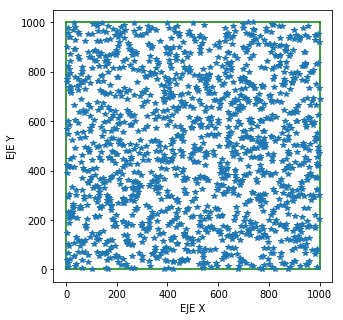

In [5]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')
plt.plot(x2,y2, "*")
plt.xlabel("EJE X")
plt.ylabel("EJE Y")

Funcion para obtener la distancia entre los puntos(sin repetir)

In [6]:
def distancia(x1,y1):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - x1[j]) ** 2 + (y1[i] - y1[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

In [7]:
d1 = distancia(x1,y1)
r1 = distancia(x2,y2)

Text(0.5,0,'Distancia')

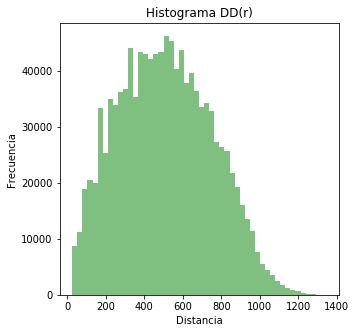

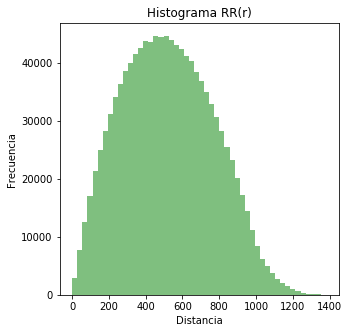

In [8]:
nbins = 50

plt.figure()
plt.hist(d1, bins=nbins, color = 'g' , alpha =0.5)
plt.title("Histograma DD(r)")
plt.ylabel("Frecuencia") 
plt.xlabel("Distancia")
plt.figure()
plt.hist(r1, bins=nbins, color = 'g' , alpha =0.5)
plt.title("Histograma RR(r)")
plt.ylabel("Frecuencia") 
plt.xlabel("Distancia")

Definimos la funcion de correlacion con las variables de entrada 'x' y 'y' como el conjunto de datos en forma de malla, 'xr' y 'yr' como el conjunto de datos aleatorios, 'lcaja' como el tamano de la caja y 'nb' como el numero de bins solicitado para los histrogramas.

In [91]:
def fcorrelacion(xm, ym, xr, yr, lcaja, nb):
    lmax = np.sqrt(2 * lcaja ** 2)  # Longitud maxima que puede haber en la caja
    lbins = lmax / nb # Longitud o rango de los bins
    dmalla = []
    drandom = []
    co = []
    dmalla = distancia(xm, ym) # Calculamos la distancia entre los puntos del arreglo en malla
    drandom = distancia(xr, yr) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    
    co = dd / rr - 1 # Calculamos la funcion de correlacion entre los histogramas

    x = np.linspace(0, lmax, len(co))
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.hist(dmalla, bins=nb, color = 'm' , alpha =0.5, label='$DD$')
    plt.hist(drandom, bins=nb, color = 'g' , alpha =0.5, label='$RR$')
    plt.legend()
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-')
    # return dd, rr


Para comprobar la funcion de correlacion, calculamos la correlacion entre dos muestras aleatorias.

<Figure size 360x360 with 0 Axes>

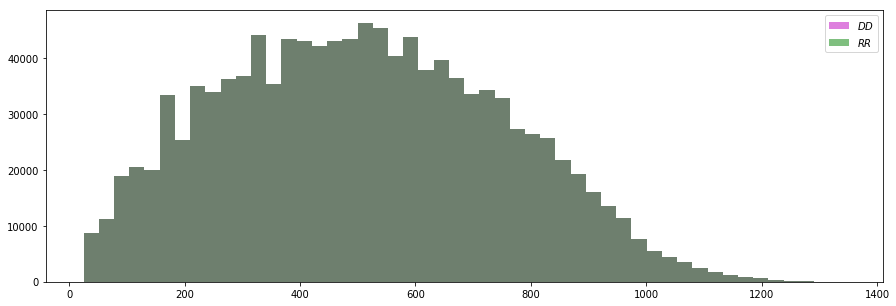

<Figure size 360x360 with 0 Axes>

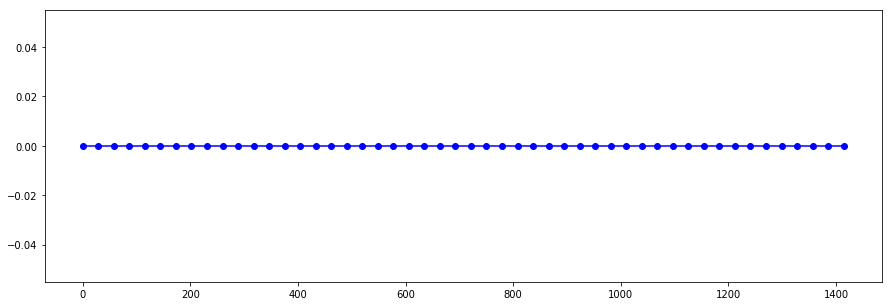

In [97]:
fcorrelacion(x2, y2, x2, y2, longitud, 50)

Ahora calculamos la correlacion entre los puntos en forma de malla y los puntos aleatorios, hacemos el mismo calculo con diferentes tamaños de bins.

<Figure size 360x360 with 0 Axes>

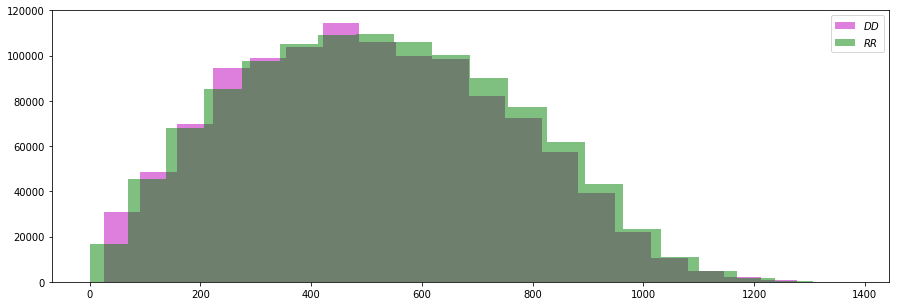

<Figure size 360x360 with 0 Axes>

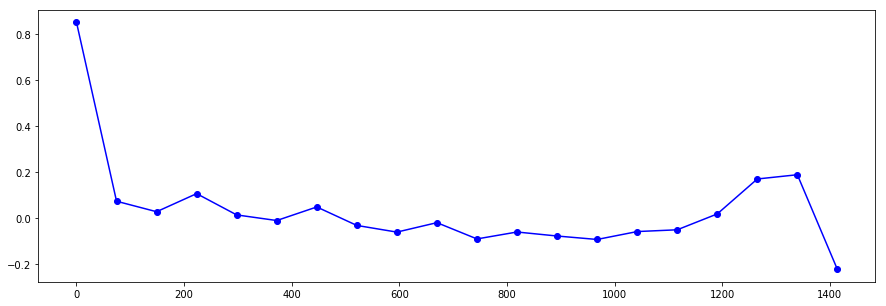

In [98]:
fcorrelacion(x1, y1, x2, y2, longitud, 20)

<Figure size 360x360 with 0 Axes>

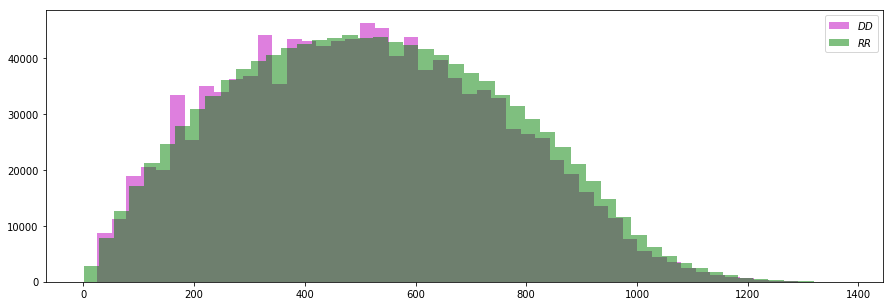

<Figure size 360x360 with 0 Axes>

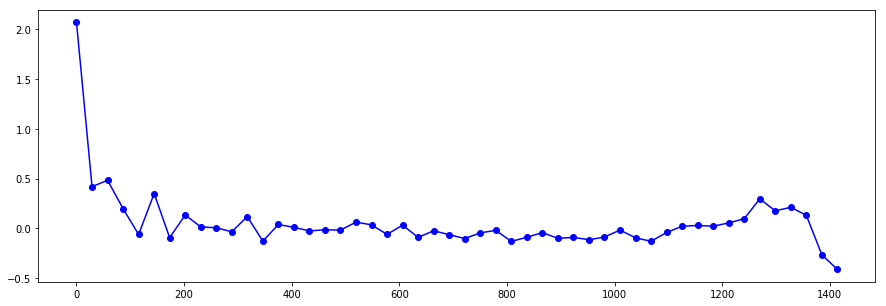

In [99]:
fcorrelacion(x1, y1, x2, y2, longitud, 50)

<Figure size 360x360 with 0 Axes>

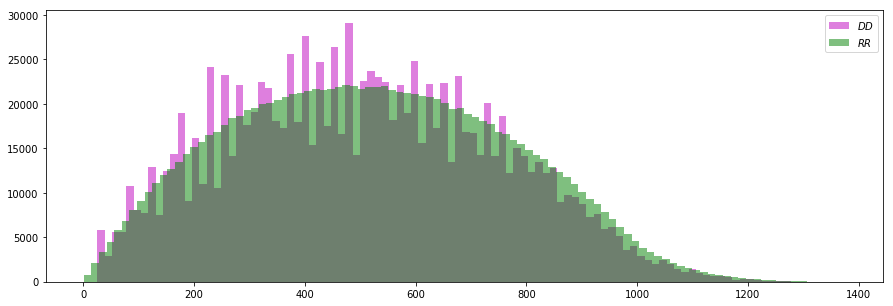

<Figure size 360x360 with 0 Axes>

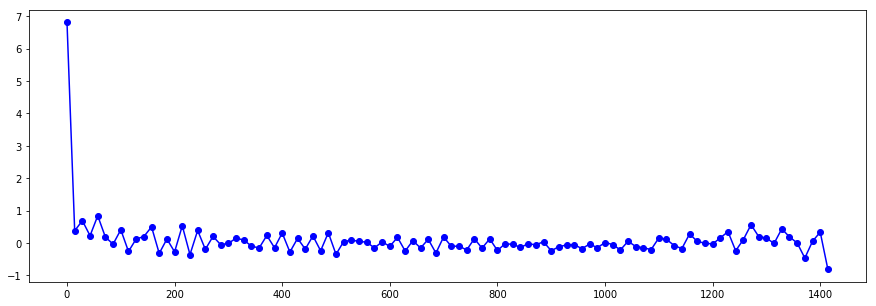

In [100]:
fcorrelacion(x1, y1, x2, y2, longitud, 100)

Generamos dos cajas con 1000 puntos aleatorios para verificar que la correlacion entre muestras aleatorias es cero.

In [136]:
nptos1 = len(x1)
lcaja1 = 1000
x3 = np.random.uniform(0, lcaja1, nptos1)
y3 = np.random.uniform(0, lcaja1, nptos1)
x4 = np.random.uniform(0, lcaja1, nptos1)
y4 = np.random.uniform(0, lcaja1, nptos1)

<Figure size 360x360 with 0 Axes>

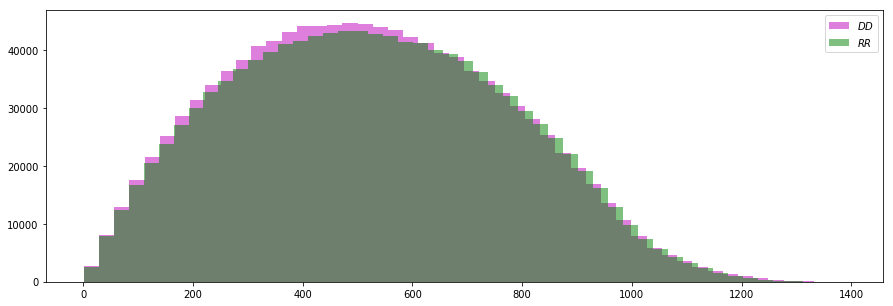

<Figure size 360x360 with 0 Axes>

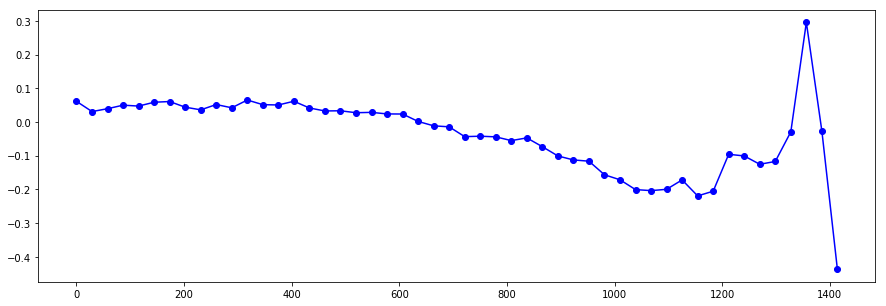

In [137]:
fcorrelacion(x3, y3, x4, y4, longitud, 50)

Ahora hacemos cambios en el numero de puntos y el tamaño de los bins.

Para una caja de longitud 1000 y separacion 50:

In [171]:
# Puntos en malla
p1, q1 = construyecaja(1000, 50)

# Puntos aleatorios
pr1 = np.random.uniform(0, 1000, len(p1))
qr1 = np.random.uniform(0, 1000, len(p1))

len(p1)

361

Obtenemos 361 puntos. Cos estos datos calculamos la funcion de correlacion variando el numero de bins.

Numero de bins: 20

<Figure size 360x360 with 0 Axes>

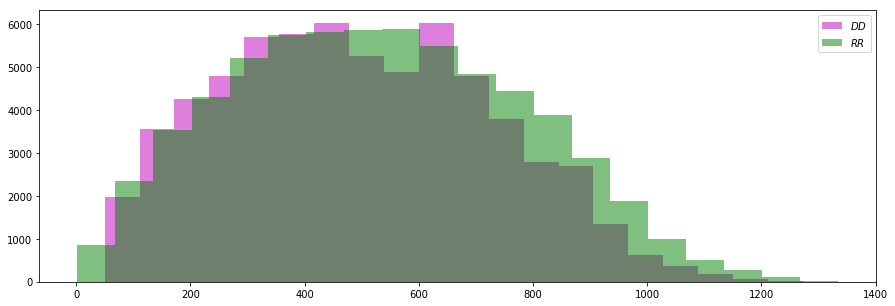

<Figure size 360x360 with 0 Axes>

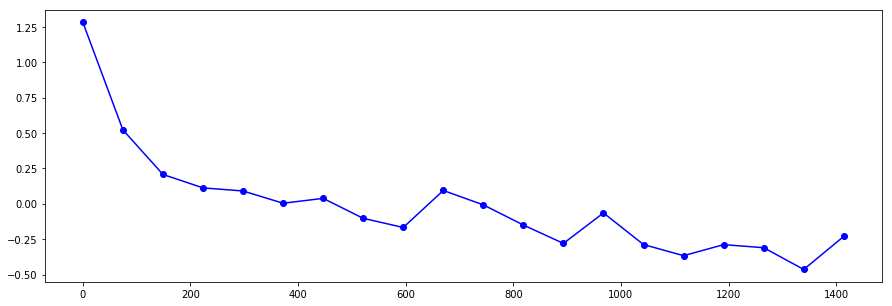

In [172]:
fcorrelacion(p1, q1, pr1, qr1, 1000, 20)

Numero de bins: 60

<Figure size 360x360 with 0 Axes>

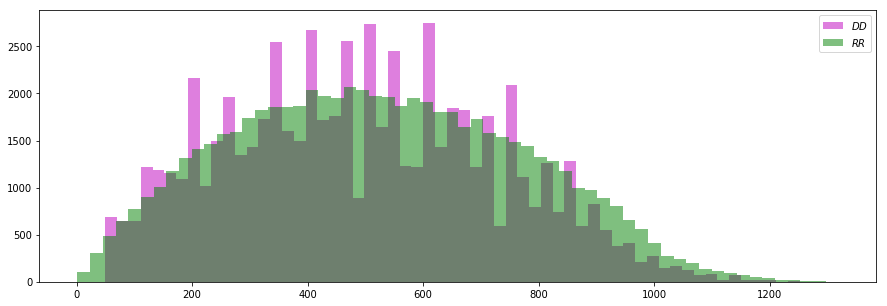

<Figure size 360x360 with 0 Axes>

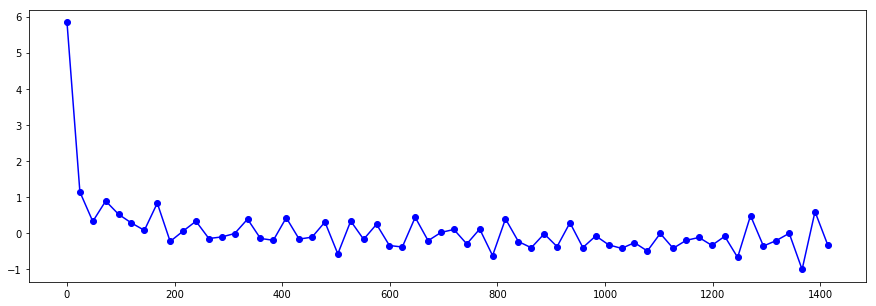

In [167]:
fcorrelacion(p1, q1, pr1, qr1, 1000, 60)

Numero de bins: 10

<Figure size 360x360 with 0 Axes>

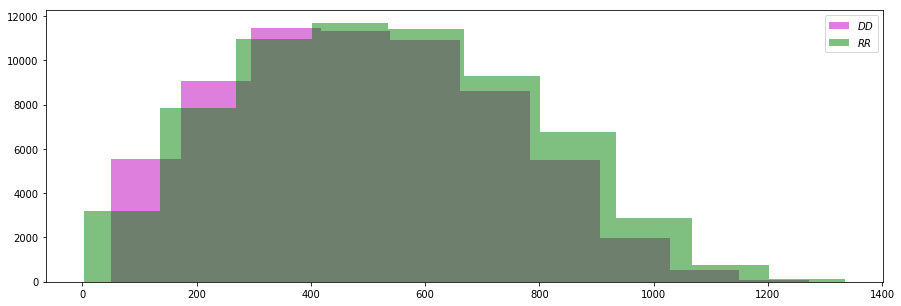

<Figure size 360x360 with 0 Axes>

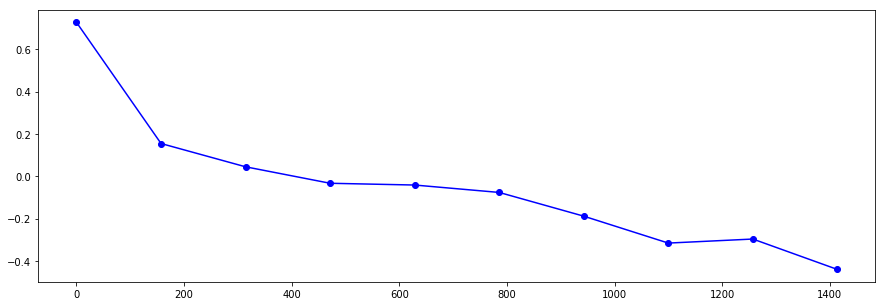

In [174]:
fcorrelacion(p1, q1, pr1, qr1, 1000, 10)

Ahora cambiamos el numero de puntos, la longitud de la caja sigue siendo de 1000 pero la separacion es de 35

In [176]:
# Puntos en malla
p2, q2 = construyecaja(1000, 35)

# Puntos aleatorios
pr2 = np.random.uniform(0, 1000, len(p1))
qr2 = np.random.uniform(0, 1000, len(p1))

len(p1)

729

Obtenemos 729 puntos. Cos estos datos calculamos la funcion de correlacion variando el numero de bins.

Numero de bins: 20

<Figure size 360x360 with 0 Axes>

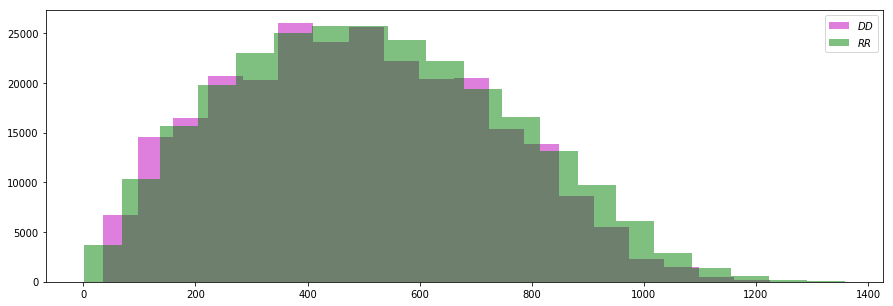

<Figure size 360x360 with 0 Axes>

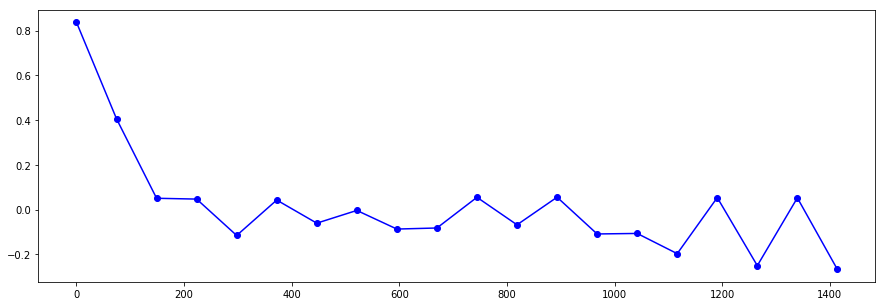

In [177]:
fcorrelacion(p2, q2, pr2, qr2, 1000, 20)

Numero de bins: 40

<Figure size 360x360 with 0 Axes>

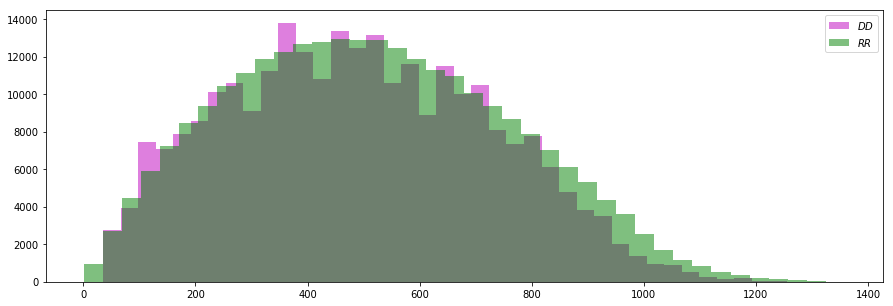

<Figure size 360x360 with 0 Axes>

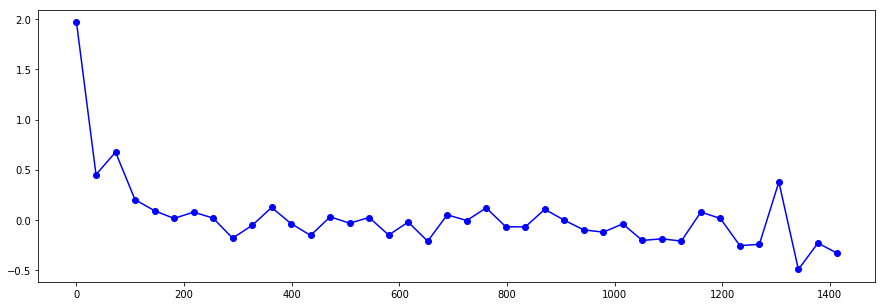

In [178]:
fcorrelacion(p2, q2, pr2, qr2, 1000, 40)

Numero de bins: 70

<Figure size 360x360 with 0 Axes>

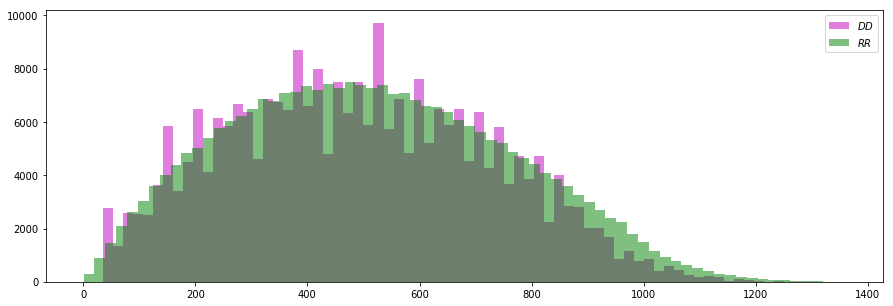

<Figure size 360x360 with 0 Axes>

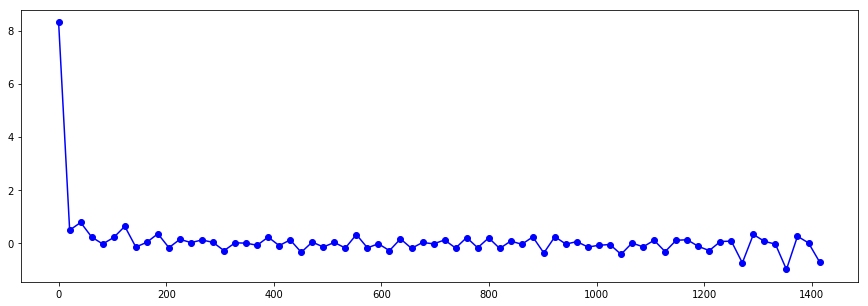

In [179]:
fcorrelacion(p2, q2, pr2, qr2, 1000, 70)